# Notebook 1: Exploratory Data Analysis 

## Objectives:

### `Explore data distribution, correlations, and trends to gain a deeper understanding of the dataset.`
### `Visualize data to extract insights, identify patterns, anomalies, and relationships between variables.`

In [1]:
# Importation of libraries

# For mathematical computations
import numpy as np

# For data analysis 
import pandas as pd

# For data visualisations
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Dataset importation
df = pd.read_excel('Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


#### Refer dataset description file to properly understand what each label means.

In [3]:
# Check shape of dataframe
df.shape

(7043, 33)

##### Finding: Over 7k records and 33 columns

In [4]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [5]:
import warnings

# Suppress all future warnings
warnings.simplefilter('ignore', FutureWarning)

### Removing irrelevant columns: 'CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude'


In [6]:
df.drop(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude'], axis = 1, inplace = True)

In [7]:
# Using info() to get basic information regarding dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

In [8]:
df.describe()

,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.265370,58.699418,4400.295755
std,24.559481,30.090047,0.441561,21.525131,1183.057152
min,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,55.000000,89.850000,1.000000,75.000000,5380.500000
max,72.000000,118.750000,1.000000,100.000000,6500.000000


#### Checking for null values


In [9]:
df.isna().sum()

Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

#### Missing values in 'Churn Reason'. This is because not all customers in the dataset are churned and hence there is no churn reason.

#### Checking for duplicated records

In [10]:
df.duplicated().sum().sum()

0

### Visualising churned vs unchurned customers in dataset

(-1.0999998562802928,
 1.0999992588423684,
 -1.0999994464936345,
 1.0999954276193669)

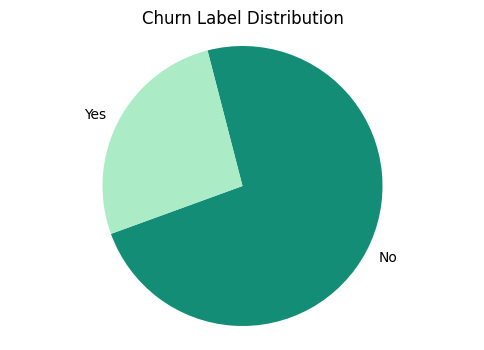

In [11]:
df['Churn Label'].value_counts()
labels = ['No', 'Yes']
counts = [5174, 1869]
colors = ['#138D75', '#ABEBC6']  # Dark green and light green colors


plt.figure(figsize=(6, 4))
plt.pie(counts, labels=labels, colors=colors, startangle=200)
plt.title('Churn Label Distribution')
plt.axis('equal')

#### Finding: Majority of the customers in the dataset are not churned. We will try to consider models like RFC or Gradient Boosting that can handle any imbalances in the datasets by combining multiple weak classifiers.

In [12]:
df.Gender.value_counts()

Gender
Male      3555
Female    3488
Name: count, dtype: int64

### Visualising Senior Citizen vs Churn Label


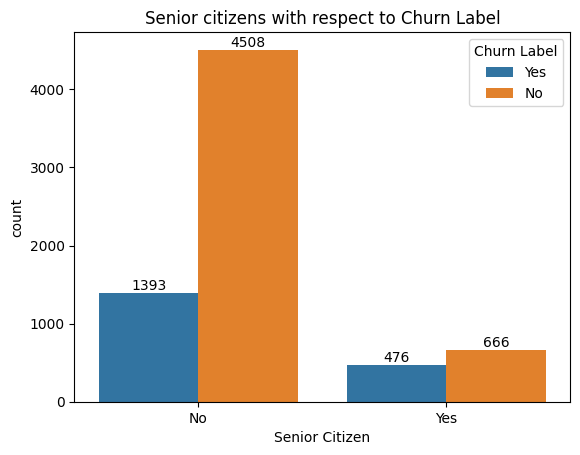

In [13]:
ax = sns.countplot(x = 'Senior Citizen', data = df, hue = 'Churn Label')
plt.title("Senior citizens with respect to Churn Label")

## Adding numbers on top of each bar
for i in ax.containers:
    ax.bar_label(i)

### Important finding: VERY HIGH RATE OF CHURN IN SENIOR CITIZENS.

In [14]:
# Finding out top churn reasons by Senior Citizens...
df_temp = df['Churn Reason'][df['Senior Citizen']=='Yes']
df_temp.value_counts()

Churn Reason
Competitor offered higher download speeds    49
Competitor made better offer                 48
Attitude of support person                   42
Attitude of service provider                 38
Competitor offered more data                 37
Price too high                               34
Don't know                                   31
Competitor had better devices                31
Product dissatisfaction                      28
Network reliability                          25
Service dissatisfaction                      20
Extra data charges                           19
Lack of self-service on Website              17
Limited range of services                    16
Long distance charges                        12
Lack of affordable download/upload speed     11
Moved                                         8
Poor expertise of online support              5
Poor expertise of phone support               3
Deceased                                      2
Name: count, dtype: int64

#### Top reasons for churn among senior citizens include: Competition, bad customer service experience, product/service dissatisfaction.

#### Handling 'Total Charges' label

In [15]:
df['Total Charges'].value_counts()

Total Charges
20.2      11
          11
19.75      9
19.65      8
20.05      8
          ..
444.75     1
5459.2     1
295.95     1
394.1      1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [16]:
# Replacing empty space with 0
df['Total Charges'].replace({" ":0}, inplace=True)

In [17]:
# Converting to float type (from object type)
df['Total Charges'] = df['Total Charges'].astype('float')

In [18]:
# Checking average for total charges in Senior citizens
df_temp = df.groupby('Senior Citizen', as_index=False)['Total Charges'].mean().sort_values(by = 'Total Charges', ascending=False)
df_temp

,Senior Citizen,Total Charges
1,Yes,2810.465193
0,No,2177.023801


### Senior citizens also spend comparatively more money on services. It is important to address the churn in Senior Citizens 

### Visualising Partner vs Churn Label


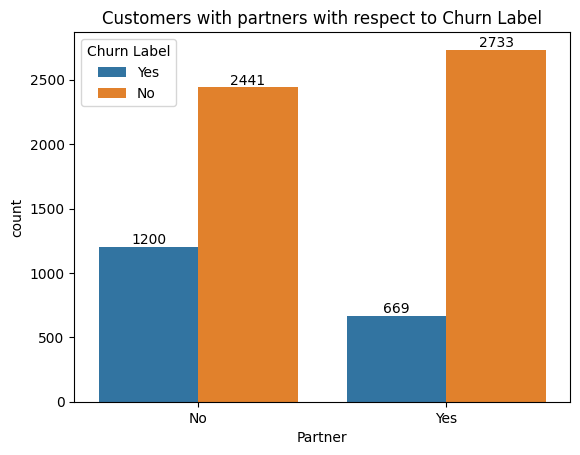

In [19]:
ax = sns.countplot(x = 'Partner', data = df, hue = 'Churn Label')

plt.title("Customers with partners with respect to Churn Label")

for i in ax.containers:
    ax.bar_label(i)

### Finding: Higher rate of churn found in customers with no partners.

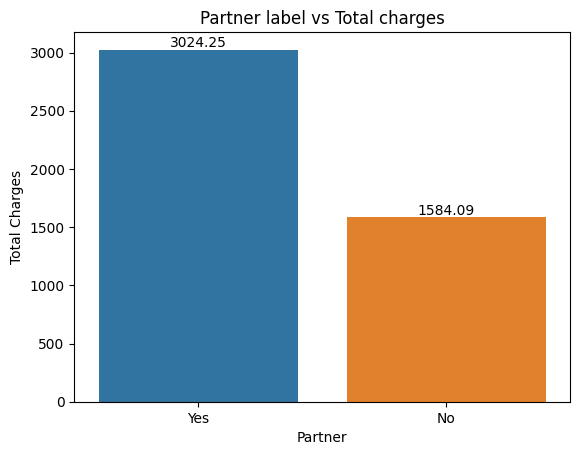

In [20]:
df_temp = df.groupby('Partner', as_index=False)['Total Charges'].mean().sort_values(by = 'Total Charges', ascending=False)

ax = sns.barplot(x = 'Partner', y = 'Total Charges', data = df_temp)

plt.title("Partner label vs Total charges")

for i in ax.containers:
    ax.bar_label(i)

### Customers with partners spend nearly `TWICE` as much on services than customers with no partners.

### Checking which type of customers have higher Tenure Months (paid to subscription to some service)


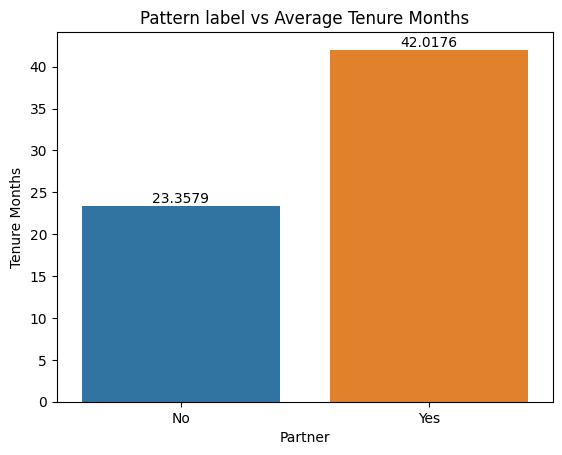

In [21]:
df_temp = df.groupby(['Partner'], as_index=False)['Tenure Months'].mean()

ax = sns.barplot(x = "Partner", y = "Tenure Months", data = df_temp)
plt.title("Pattern label vs Average Tenure Months")
for i in ax.containers:
    ax.bar_label(i) 

#### Finding: Customers with partners have a tenure time of nearly `DOUBLE` than customers with no partners.

### "CLTV" label (Estimate for how important a customer is)
Checking in-depth how different attributes like 'Gender' , 'Senior Citizen', 'Partner', 'Dependents' relate to this score.

In [22]:
df_temp = df.groupby(['Gender' , 'Senior Citizen', 'Partner', 'Dependents' ], as_index=False)['CLTV'].mean().sort_values(by = 'CLTV', ascending=False)
df_temp

,Gender,Senior Citizen,Partner,Dependents,CLTV
15,Male,Yes,Yes,Yes,4849.448276
5,Female,Yes,No,Yes,4655.333333
6,Female,Yes,Yes,No,4603.306977
3,Female,No,Yes,Yes,4601.604069
2,Female,No,Yes,No,4575.627965
11,Male,No,Yes,Yes,4572.056090
7,Female,Yes,Yes,Yes,4562.333333
10,Male,No,Yes,No,4546.203922
14,Male,Yes,Yes,No,4481.614865
12,Male,Yes,No,No,4317.831967


### "Churn Score" label (Estimate for how likely customer is to churn)
Checking in-dept how different attributes like 'Gender' , 'Senior Citizen', 'Partner', 'Dependents' relate to this score.

In [23]:
df_temp = df.groupby(['Gender' , 'Senior Citizen', 'Partner', 'Dependents' ], as_index=False)['Churn Score'].mean().sort_values(by = 'Churn Score', ascending=False)
df_temp

,Gender,Senior Citizen,Partner,Dependents,Churn Score
5,Female,Yes,No,Yes,75.333333
12,Male,Yes,No,No,66.922131
4,Female,Yes,No,No,66.531847
14,Male,Yes,Yes,No,62.888514
0,Female,No,No,No,60.652941
8,Male,No,No,No,60.148487
10,Male,No,Yes,No,59.628758
6,Female,Yes,Yes,No,59.590698
2,Female,No,Yes,No,58.516854
1,Female,No,No,Yes,55.983333


### Analysing 'Churn Reason'

In [24]:
df['Churn Reason'].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

### Findings:
#### 3 major reasons for churn: 
#### 1. Attitude of support person (or) service provider.
#### 2. Competitors made better offers.
#### 3. Service dissatisfaction.

In [25]:
# Finally exporting the dataset
df.to_csv("Telco_customer_churn-2.csv")

### Company should work on improving their customer service, do rigorous competition analysis and continually focus on improving their services further to decrease Churn.

Always remember, its easier to retain a customer than to gain a new one!

## Crucial findings from Notebook:




1. __High Churn Rate Among Senior Citizens with Higher Service Spending__: The churn rate is notably elevated among senior citizens who invest more in telecom services. This issue requires immediate attention and intervention.

2. __Increased Churn Rate Among Customers Without Partners__: Customers who do not have partners or dependents tend to experience a higher churn rate. Strategies should be developed to retain this customer segment.

3. __Family-Oriented Customers Show Greater Service Expenditure__: Customers with family connections, such as partners or dependents spend significantly higher on telecom services compared to those without family ties.

4. __Loyal Customers with Extended Tenure Are Often Family-Centric__: The most loyal customers, characterized by long service tenure, frequently have family affiliations. Retaining these valued customers should be a top priority.

5. __Partnership Status Correlates with Prolonged Service Subscription__: Customers with partners or spouses tend to subscribe to services for nearly double the duration compared to those without partners. Recognizing and catering to the preferences of partnered customers is crucial for enhancing loyalty.

6. __Churn Due to Customer Support Experience__: A substantial number of customers are leaving due to issues related to the attitude of support personnel or the service provider. Improving the overall customer service experience is essential.

7. __Competitive Analysis and Pricing Strategy Optimization__: Addressing customers who switch to competitors requires rigorous competition analysis and potential adjustments to pricing plans to remain competitive.

8. __Continuous Product and Service Enhancement__: Lastly, the company should prioritize ongoing improvements to its products and services to ensure that customer expectations are consistently met and exceeded.


## Made by: Hrishikesh Reddy Papasani
## Github Profile: https://github.com/Hrishikesh-Papasani